# Klassifizierung und Vorhersage

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daten

In [107]:
df = sns.load_dataset("titanic")

In [108]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [109]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Prüfen, ob Werte fehlen:

In [111]:
df.isnull().any(axis = 1).sum()

709

# Explorative Analyse

## Klasse

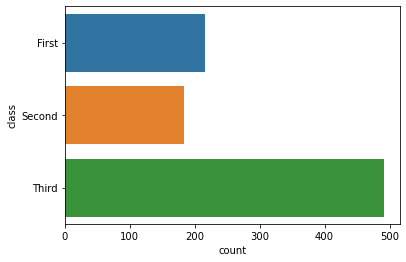

In [112]:
sns.countplot(data=df, y="class");

Wir wollen in dem Plot eine Sortierung nach Häufigkeit der Klassen. Dafür nutzen wir den Befehl `.value_counts()`

In [113]:
df['class'].value_counts(ascending=True)

Second    184
First     216
Third     491
Name: class, dtype: int64

Dieser wird mit `.index` kombiniert und dann als neues Objekt `my_order` gespeichert:

In [114]:
ordnung_klasse = df['class'].value_counts(ascending=True).index

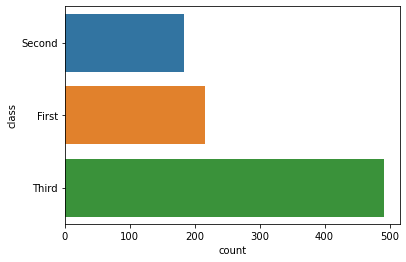

In [115]:
sns.countplot(data=df, y="class", order=ordnung_klasse);

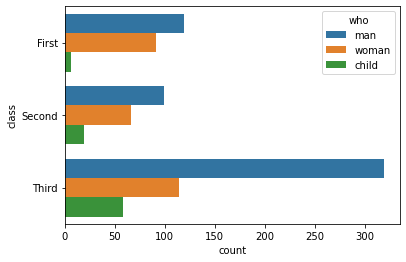

In [116]:
sns.countplot(data=df, y="class", hue="who");

## Überlebende

Nun möchten wir nur die überlebenden Personen betrachten:

In [117]:
df_surv = df.loc[df['survived'] == 1]

Index für die Sortierung nach Häufigkeit erstellen:

In [118]:
ordnung_klasse_surv = df_surv['class'].value_counts(ascending=True).index

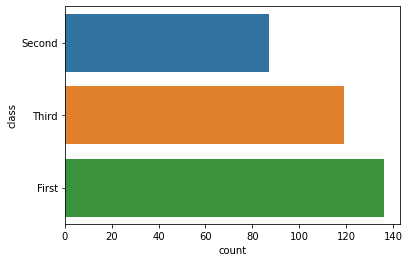

In [119]:
sns.countplot(data=df_surv, y="class", order=ordnung_klasse_surv);

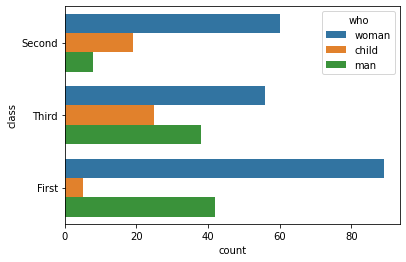

In [120]:
sns.countplot(data=df_surv, y="class", hue="who", order=ordnung_klasse_surv);

### Anteil Frauen vs Männer

Filterung der Frauen (Zeilen) und Auswahl der Variable "survived"

In [121]:
frauen = df.loc[df["sex"] == "female"]["survived"]
frauen.head(10)

1     1
2     1
3     1
8     1
9     1
10    1
11    1
14    0
15    1
18    0
Name: survived, dtype: int64

Berechnung Verhältnis der überlebenden Frauen:

In [122]:
rate_frauen = round(100*sum(frauen)/len(frauen), 2)

In [123]:
print("% der Frauen, die überlebt haben:", rate_frauen, "%")

% der Frauen, die überlebt haben: 74.2 %


Wie viele Männer haben überlebt?

In [124]:
men = df.loc[df["sex"] == 'male']["survived"]
rate_men = round(100*sum(men)/len(men),2)
print("% der Männer, die überlebt haben:", rate_men, "%")

% der Männer, die überlebt haben: 18.89 %


# Model

Auswahl einiger Variablen

In [125]:
# Features
features = ["class", "sex"]
X = df[features]
# Abhängige Variable
y = df["survived"]

In [126]:
X.isnull().any(axis = 1).sum()

0

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Prüfung, ob fehlende Werte enthalten sind:

In [128]:
X_train.head()

,class,sex
331,First,male
733,Second,male
382,Third,male
704,Third,male
813,Third,female


In [129]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [130]:
X_train.head()

,class_First,class_Second,class_Third,sex_female,sex_male
331,1,0,0,0,1
733,0,1,0,0,1
382,0,0,1,0,1
704,0,0,1,0,1
813,0,0,1,1,0


## Entscheidungsbaum

Wir ezeugen nun das Klassisikationsmodell (decision tree classifier: tree_clf)

In [131]:
from sklearn import tree 

# Model erstellen
tree_clf = tree.DecisionTreeClassifier(max_depth=2)

# Model auf die Daten anwenden
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Entscheidungsbaum visualisieren

In [132]:
class_names = ["Gestorben", "Überlebt"]
feature_names = X_train.columns

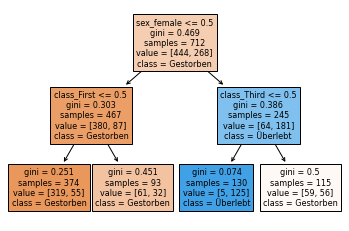

In [133]:
tree.plot_tree(tree_clf, feature_names=feature_names, class_names=class_names, filled=True);

# Modell mit Trainingsdaten prüfen

Vorhersage für die Trainingsdaten durchführen

In [134]:
y_pred = tree_clf.predict(X_train)

## Fehlermatrix

Fehlermatrix erzeugen:

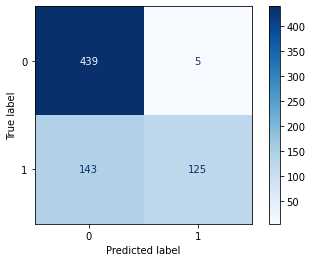

In [135]:
from sklearn import metrics

metrics.plot_confusion_matrix(tree_clf, X_train, y_train, cmap=plt.cm.Blues);

In [136]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred).ravel()

In [137]:
print(" TN", tn, "\n", 
    "FP", fp, "\n", 
    "FN", fn, "\n", 
    "TP", tp) 

 TN 439 
 FP 5 
 FN 143 
 TP 125


In [138]:
treffergenauigkeit = (tn + tp) / (tn + tp + fn + fp) 
sensitivitaet = tp / (tp + fn) 
positiver_vorhersagewert = tp / (tp + fp)
spezifizitaet = tn / (tn + fp)

print(" Treffergenauigkeit (Accuracy):", round(treffergenauigkeit, 2), "\n", 
    "Sensitivität (Recall):", round(sensitivitaet, 2), "\n", 
    "Positiver Vorhersagewert (Precision):", round(positiver_vorhersagewert, 2), "\n",
    "Spezifizität (Specificity):", round(spezifizitaet, 2))

 Treffergenauigkeit (Accuracy): 0.79 
 Sensitivität (Recall): 0.47 
 Positiver Vorhersagewert (Precision): 0.96 
 Spezifizität (Specificity): 0.99


Übersicht verschiedener Kennzahlen:

In [139]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.86       444
           1       0.96      0.47      0.63       268

    accuracy                           0.79       712
   macro avg       0.86      0.73      0.74       712
weighted avg       0.83      0.79      0.77       712



## ROC-Kurve

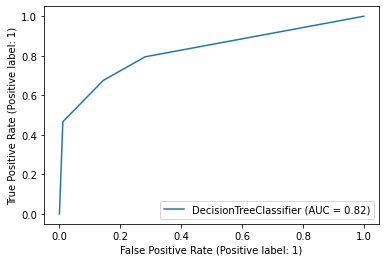

In [140]:
metrics.plot_roc_curve(tree_clf, X_train, y_train);  

Precision-Recall-Kurve:

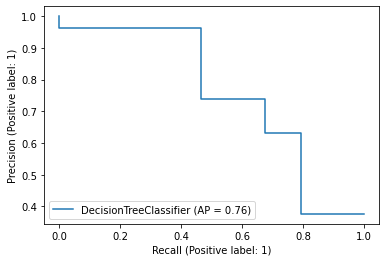

In [141]:
metrics.plot_precision_recall_curve(tree_clf, X_train, y_train);

# Evaluierung mit Testdaten

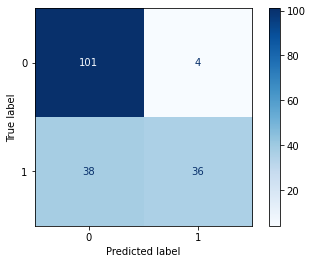

In [142]:
metrics.plot_confusion_matrix(tree_clf, X_test, y_test, cmap=plt.cm.Blues);

In [143]:
y_pred_test = tree_clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       105
           1       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179



# Kalibrierung

In [144]:
from sklearn.calibration import CalibratedClassifierCV

calibrator = CalibratedClassifierCV(tree_clf, cv=3)
calibrator.fit(X_train, y_train);

proba_survived = tree_clf.predict_proba(X_test)[:, 1]

In [145]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, proba_survived, n_bins=10)

Plot mit Matplotlib erstellen

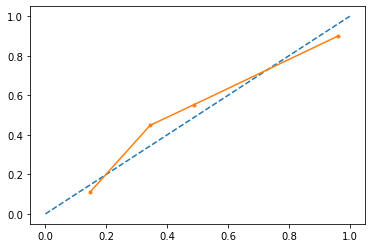

In [146]:
# Diagonale Linie als Beispiel für einer perfekte Kalibrierung
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(prob_pred, prob_true, marker='.');

Gleiche Darstellung mit weiteren Optionen

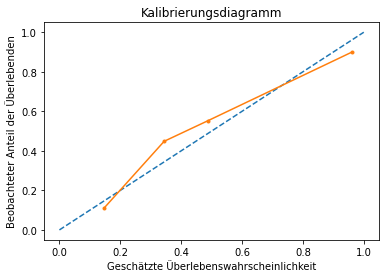

In [147]:
fig, ax = plt.subplots()

ax.plot([0, 1], [0, 1], linestyle='--')
ax.plot(prob_pred, prob_true, marker='.')
ax.set_xlabel('Geschätzte Überlebenswahrscheinlichkeit')
ax.set_ylabel('Beobachteter Anteil der Überlebenden')
ax.set_title(r'Kalibrierungsdiagramm');

# Brier Score

Referenzwert für Brier Score erzeugen

In [148]:
survived_prozent = round(sum(y_train)/len(y_train),2)
print("Gesamtanteil der Überlebenden in den Trainingsdaten:", survived_prozent)

Gesamtanteil der Überlebenden in den Trainingsdaten: 0.38


Daten erzeigen, die für jede Person in den Trainingsdaten eine Überlebenswahrscheinlichkeit gemäß `survived_prozent` angibt.

In [149]:
n = len(y_test)
survived_heuristik = np.repeat(survived_prozent, n)  

Brier-Referenz-Score:

In [150]:
brier_referenz = metrics.brier_score_loss(y_test, survived_heuristik)
round(brier_referenz, 3)

0.244

Brier-Score für unser Modell:

In [151]:
brier_modell = metrics.brier_score_loss(y_test, proba_survived)
round(brier_modell, 3)

0.149

Verbesserung durch Modell:

In [152]:
brier_differenz = brier_referenz - brier_modell

skill_score = 100 * ((brier_differenz) / brier_referenz)

print("Der Unterschied zwischen den Brier Scores entspricht ", round(brier_differenz, 3), ", was einer ", round(skill_score, 2), "-prozentigen Verbesserung entspricht", sep="")

Der Unterschied zwischen den Brier Scores entspricht 0.095, was einer 38.92-prozentigen Verbesserung entspricht
